In [1]:
# Import useful libraries

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 9999
pd.options.display.float_format = '{:20,.2f}'.format

# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from scipy.stats import ttest_ind
from scipy.stats import fisher_exact

In [3]:
data = pd.read_csv("Student Alcohol Consumption_clean.csv")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,nursery,internet,MG1,MG2,MG3,PG1,PG2,PG3,_merge,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,higher,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,alc,Pedu
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,yes,no,5.00,6.00,6.00,0.00,11.00,11.00,both,mother,2.00,2.00,0.00,yes,no,no,no,yes,no,4.00,3.00,4.00,1.00,1.00,3.00,6.00,2.00,8
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,no,yes,5.00,5.00,6.00,9.00,11.00,11.00,both,father,1.00,2.00,0.00,no,yes,no,no,yes,no,5.00,3.00,3.00,1.00,1.00,3.00,4.00,2.00,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,yes,yes,7.00,8.00,10.00,12.00,13.00,12.00,both,mother,1.00,2.00,3.00,yes,no,yes,no,yes,no,4.00,3.00,2.00,2.00,3.00,3.00,10.00,5.00,2
3,GP,F,15,U,GT3,T,4,2,health,services,home,yes,yes,15.00,14.00,15.00,14.00,14.00,14.00,both,mother,1.00,3.00,0.00,no,yes,yes,yes,yes,yes,3.00,2.00,2.00,1.00,1.00,5.00,2.00,2.00,6
4,GP,F,16,U,GT3,T,3,3,other,other,home,yes,no,6.00,10.00,10.00,11.00,13.00,13.00,both,father,1.00,2.00,0.00,no,yes,yes,no,yes,no,4.00,3.00,2.00,1.00,2.00,5.00,4.00,3.00,6


Students in the dataset come from 2 different schools. This may have some correlation with the grades of students from each school. We will explore that using Hypothesis Testing with t-test.

### Hypothesis: Students who attend Gabriel Pereira school and students who attend Mousinho da Silveira school have the same grades for Math and Portuguese. 
We will be looking at a 0.05 level of significance for this Hypothesis Test.

First, we compare whether there is any significant difference in grades between students who attend different schools.

In [4]:
#define samples
GP = data[data['school']=='GP']
MS = data[data['school']=='MS']

#drop GP students who don't take Math
GP_Math = GP.dropna(axis='rows',subset=['MG3'], inplace=False)
GP_Math = GP_Math.reset_index(drop=True)

#drop MS students who don't take Math
MS_Math = MS.dropna(axis='rows',subset=['MG3'], inplace=False)
MS_Math = MS_Math.reset_index(drop=True)

#drop GP students who don't take Portuguese
GP_Por = GP.dropna(axis='rows',subset=['PG3'], inplace=False)
GP_Por = GP_Por.reset_index(drop=True)

#drop MS students who don't take Portuguese
MS_Por = MS.dropna(axis='rows',subset=['PG3'], inplace=False)
MS_Por = MS_Por.reset_index(drop=True)

In [7]:
ttest_ind(GP_Math['MG1'], MS_Math['MG1'], equal_var=False)

Ttest_indResult(statistic=0.5606289865577441, pvalue=0.5772318336410676)

In [6]:
ttest_ind(GP_Math['MG2'], MS_Math['MG2'], equal_var=False)

Ttest_indResult(statistic=1.166819827539805, pvalue=0.2478228646798125)

In [8]:
ttest_ind(GP_Math['MG3'], MS_Math['MG3'], equal_var=False)

Ttest_indResult(statistic=1.08644494948641, pvalue=0.2816501544819306)

Since p-value for MG1, MG2, MG3 are greater than 0.05, we conclude that it is statistically insignificant and there is strong evidence that the hypothesis is correct. 

Thus, from this hypothesis testing, students who attend Gabriel Pereira school and students who attend Mousinho da Silveira school <b>have the same grades for Math</b>.

In [10]:
ttest_ind(GP_Por['PG1'], MS_Por['PG1'], equal_var=False)

Ttest_indResult(statistic=7.086581232869057, pvalue=6.852663023294345e-12)

In [11]:
ttest_ind(GP_Por['PG2'], MS_Por['PG2'], equal_var=False)

Ttest_indResult(statistic=6.349159996256405, pvalue=6.852098991813977e-10)

In [9]:
ttest_ind(GP_Por['PG3'], MS_Por['PG3'], equal_var=False)

Ttest_indResult(statistic=6.595145280411525, pvalue=1.6916898124392917e-10)

Since p-value for PG1, PG2, PG3 are less than 0.05, we conclude that it is statistically significant and that there is strong evidence that the hypothesis is not correct.

Thus, from this hypothesis testing, students who attend Gabriel Pereira school and students who attend Mousinho da Silveira school <b>have different grades for Portuguese</b>.

---

### Are there any significant differences in students' condition and study habit data between students who attend Gabriel Pereira school and those who attend Mousinho da Silveira school?

As we can see, the t-test for Math returned a p-value greater than 0.05, which is considered to be insignificant statistically. However, the t-test of the Portuguese scores returned a p-value of much less than 0.05, indicating that the difference is statistically significant, and hence we shall use Portuguese, mainly PG3 for this analysis.

Text(0.5, 1.0, 'Mousinho da Silva PG3 Boxplot')

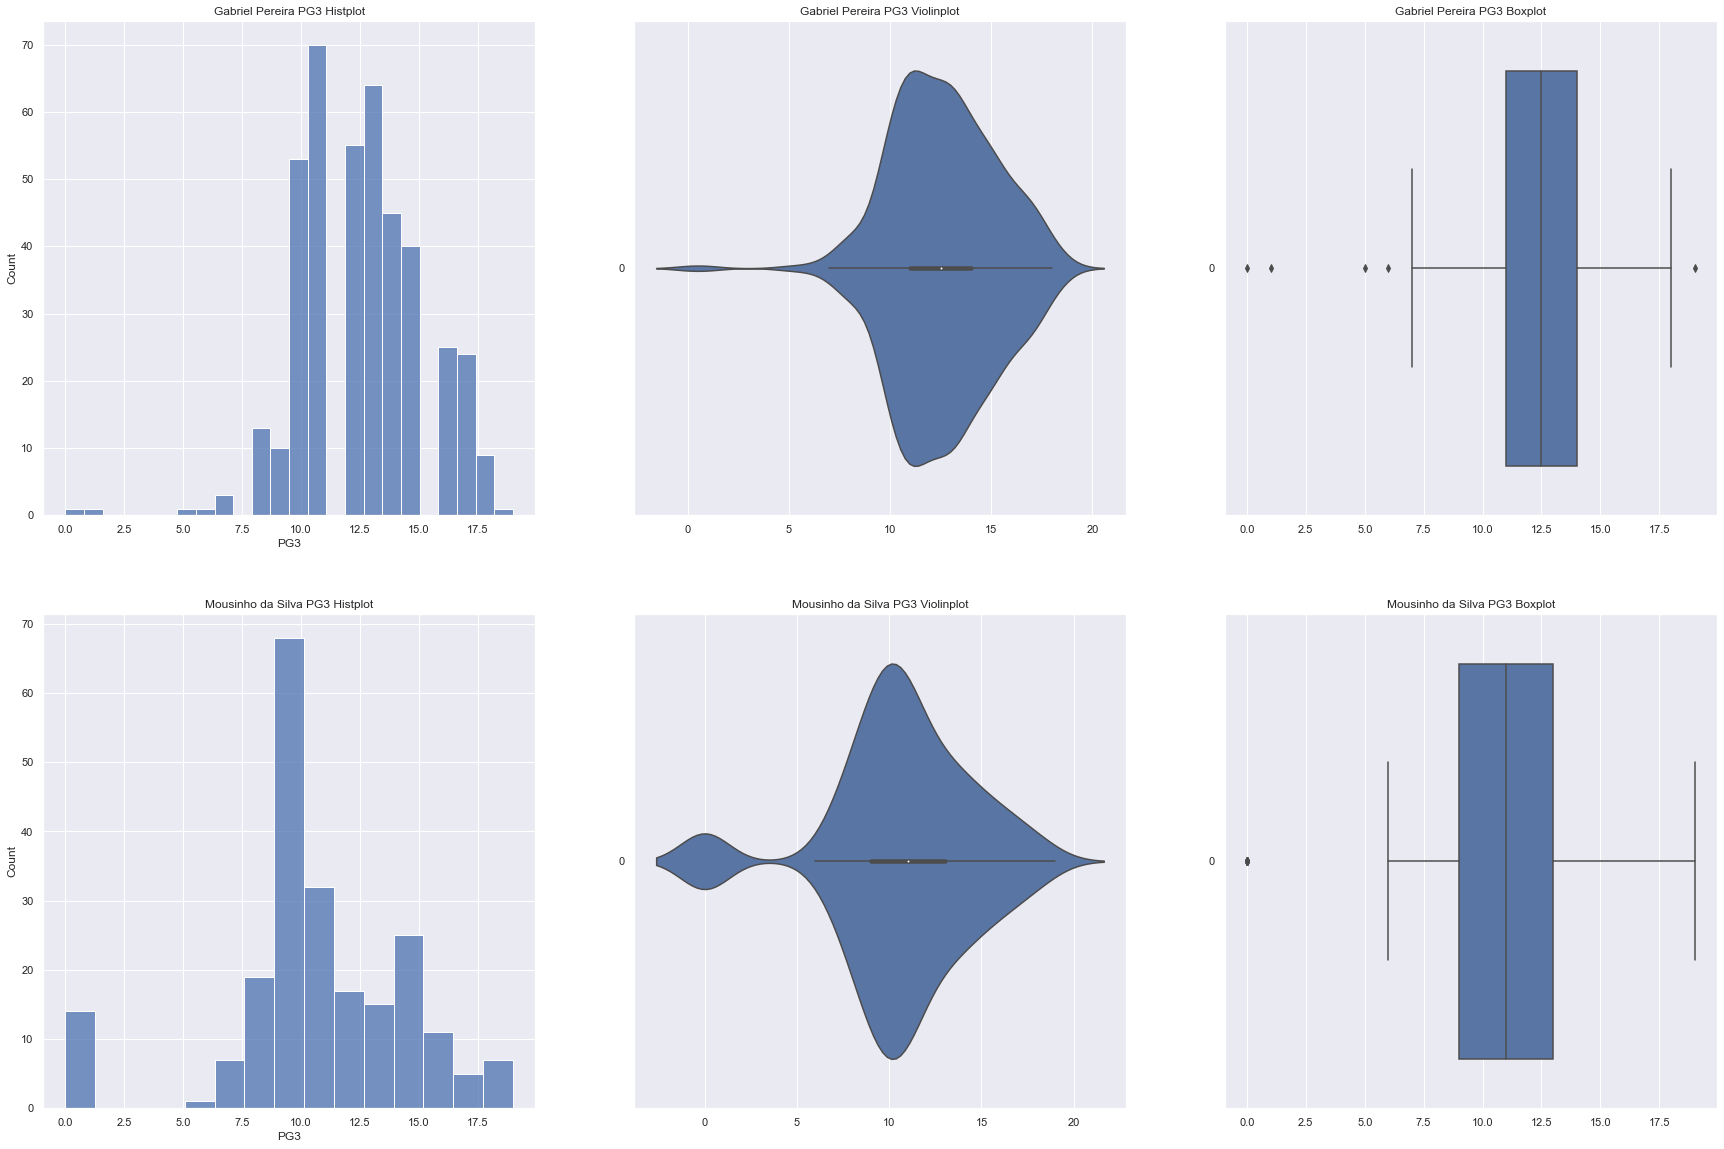

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 20))

#Histplot, Violinplot, and boxplot of PG3 for both schools
sb.histplot(ax = axes[0][0], data = GP_Por['PG3'])
sb.violinplot(ax = axes[0][1], data = GP_Por['PG3'], orient = "h")
sb.boxplot(ax = axes[0][2], data = GP_Por['PG3'], orient = "h")


axes[0][0].set_title("Gabriel Pereira PG3 Histplot")
axes[0][1].set_title("Gabriel Pereira PG3 Violinplot")
axes[0][2].set_title("Gabriel Pereira PG3 Boxplot")

sb.histplot(ax = axes[1][0], data = MS_Por['PG3'])
sb.violinplot(ax = axes[1][1], data = MS_Por['PG3'], orient = "h")
sb.boxplot(ax = axes[1][2], data = MS_Por['PG3'], orient = "h")

axes[1][0].set_title("Mousinho da Silva PG3 Histplot")
axes[1][1].set_title("Mousinho da Silva PG3 Violinplot")
axes[1][2].set_title("Mousinho da Silva PG3 Boxplot")

In [14]:
print(f"Gabriel Pereira PG3 mean : {GP_Por['PG3'].mean()}\nMousinho da Silva PG3 mean : {MS_Por['PG3'].mean()}")

Gabriel Pereira PG3 mean : 12.591346153846153
Mousinho da Silva PG3 mean : 10.678733031674208


We can see from the plots above that the difference in dataset, although perceptibly not that big (the difference is just under 2 for the mean and median), but due to the high number of data points, the difference is statistically significant. Hence we want to use the t_test to find the differences in studying habits for the two schools. 

Firstly we take a look at school support.

In [15]:
GP_Por.schoolsup.replace(('yes', 'no'), (1, 0), inplace=True)
MS_Por.schoolsup.replace(('yes', 'no'), (1, 0), inplace=True)

We replace the 'yes' and 'no' items in the category with Boolean values of 1 and 0 respectively and we perform the fisher exact test to find whether there is a statistically significant difference between Gabriel Pereira and Mourinho da Silva schools.

In [17]:
contingency_table = pd.crosstab(GP_Por['schoolsup'], MS_Por['schoolsup'])

# perform Fisher's exact test
odds_ratio, p_value = fisher_exact(contingency_table)

print('Odds Ratio:', odds_ratio)
print('p-value:', p_value)

Odds Ratio: 1.3658536585365855
p-value: 0.709560706748789


The p-value as indicated above is very high, indicating an insignificant difference in schoolsup of the two schools, hence we take a look at studytime, which has one of the stronger correlations (refer to the correlation matrix shown in EDA)

In [18]:
ttest_ind(GP_Por['studytime'], MS_Por['studytime'], equal_var=False)

Ttest_indResult(statistic=3.70777771266313, pvalue=0.00023385197707950667)

Text(0.5, 1.0, 'Mousinho da Silva studytime Boxplot')

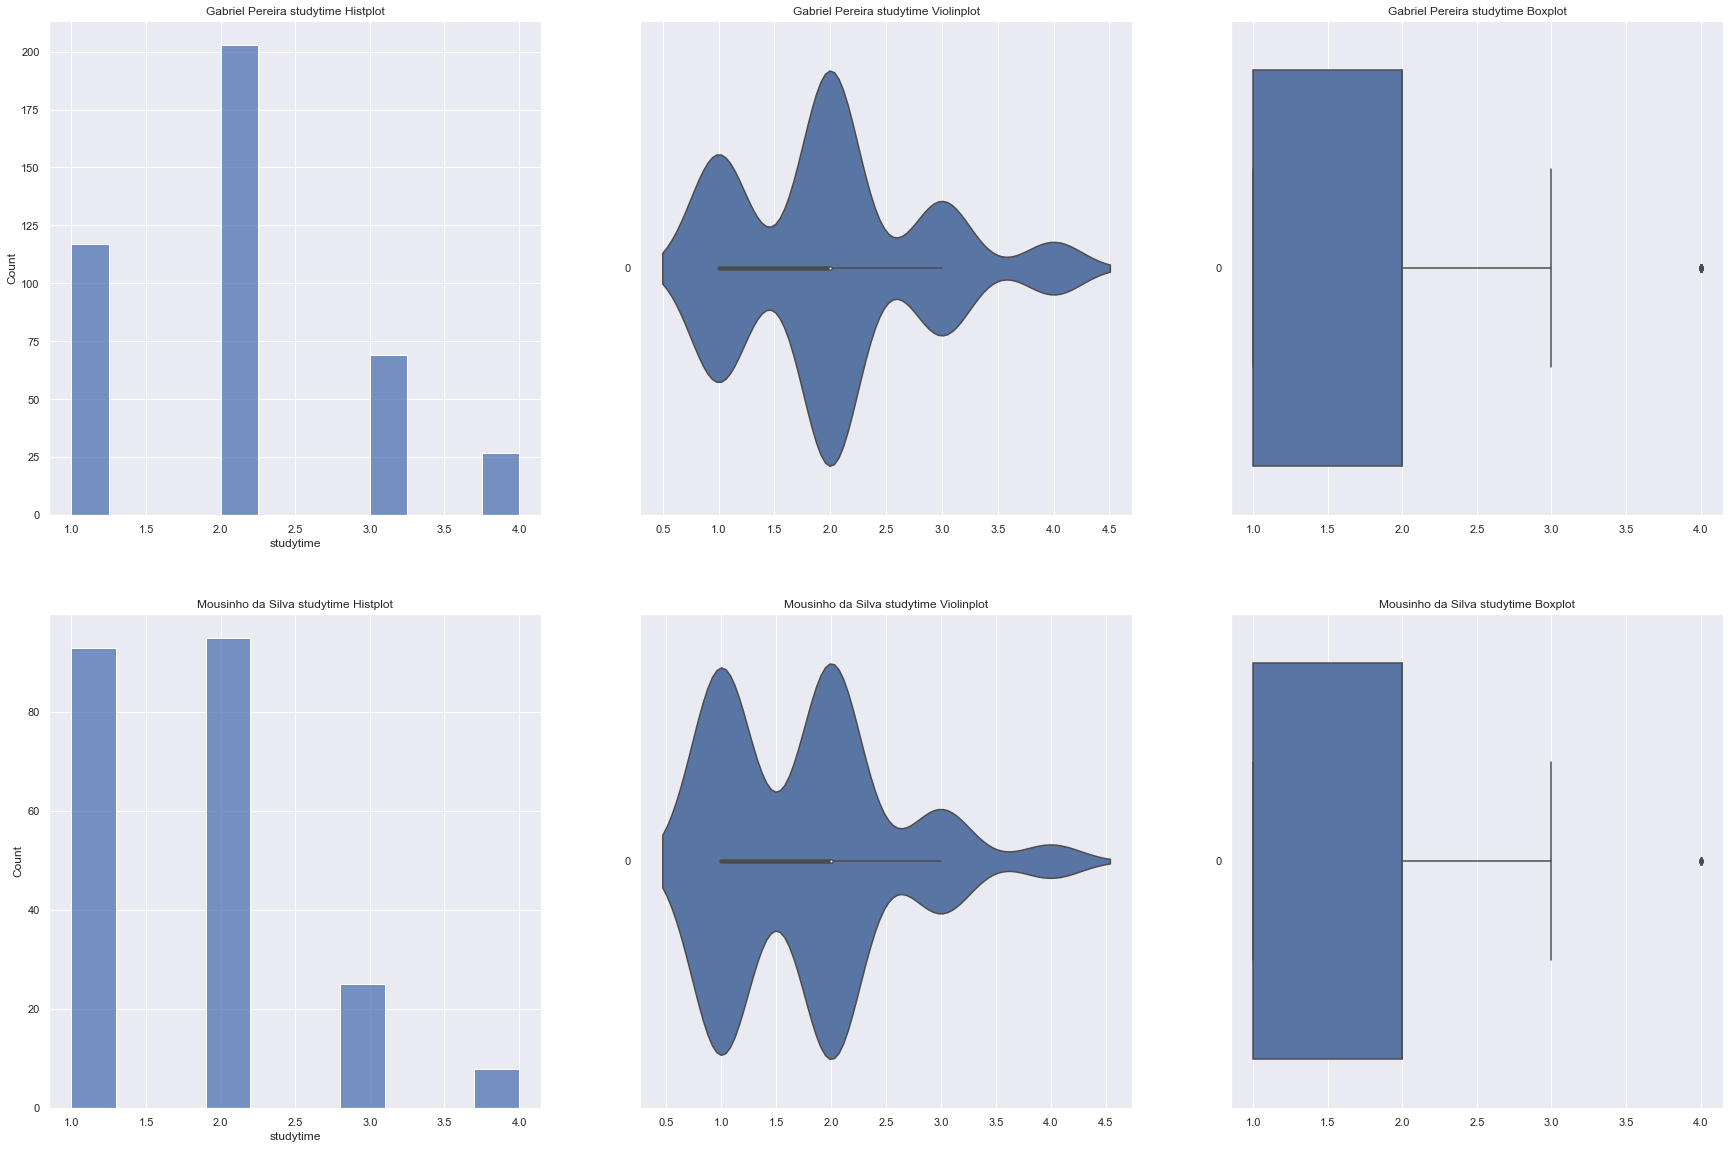

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 20))

#Histplot, Violinplot, and boxplot of studytime for both schools
sb.histplot(ax = axes[0][0], data = GP_Por['studytime'])
sb.violinplot(ax = axes[0][1], data = GP_Por['studytime'], orient = "h")
sb.boxplot(ax = axes[0][2], data = GP_Por['studytime'], orient = "h")


axes[0][0].set_title("Gabriel Pereira studytime Histplot")
axes[0][1].set_title("Gabriel Pereira studytime Violinplot")
axes[0][2].set_title("Gabriel Pereira studytime Boxplot")

sb.histplot(ax = axes[1][0], data = MS_Por['studytime'])
sb.violinplot(ax = axes[1][1], data = MS_Por['studytime'], orient = "h")
sb.boxplot(ax = axes[1][2], data = MS_Por['studytime'], orient = "h")

axes[1][0].set_title("Mousinho da Silva studytime Histplot")
axes[1][1].set_title("Mousinho da Silva studytime Violinplot")
axes[1][2].set_title("Mousinho da Silva studytime Boxplot")

In [20]:
GP_Por['studytime'].describe()

count                 416.00
mean                    2.01
std                     0.84
min                     1.00
25%                     1.00
50%                     2.00
75%                     2.00
max                     4.00
Name: studytime, dtype: float64

In [21]:
MS_Por['studytime'].describe()

count                 221.00
mean                    1.76
std                     0.79
min                     1.00
25%                     1.00
50%                     2.00
75%                     2.00
max                     4.00
Name: studytime, dtype: float64

#### Conclusion

Here we see that there is a significant difference in studytime between Mousinho da Silva students to Gabriel Pereira students, where Gabriel Pereira students typically spend more time studying than their Gabriel Pereira counterparts, which corresponds to the analysis above of GP students attaining higher PG3 grades. 

However, there is no strong correlation between the two, suggesting that other factors may be in play such as the education of parents, innate intelligence (not captured in the data), or even the culture difference between the two schools where GP may be more inclined towards linguistics than MS, as shown in the insignificant difference in Math scores between the two schools.